# Marketing Analytics
by Kuanchieh Peng

## Problem Statement
Most marketing campaigns fail within 3 months. However, if you analyze data from the campaigns that failed and adjust your efforts to achieve your business objectives, you get meaningful insights out of the failures.

I am a marketing data analyst and the Chief Marketing Officer told me that recent marketing campaigns have not been as effective as they were expected to be. Goal: I need to analyze datasets to understand this problem and propose data-driven solutions.
## Dataset Overview
The data set ifood_df.csv consists of 2206 customers of XYZ company with data on customer profiles, product preferences, campaign successes/failures, and channel performance.
## Sources
Dataset is ifood_df.csv from https://github.com/nailson/ifood-data-business-analyst-test. I do not own this dataset.
## Brief
- Preprocessing
- EDA
- Statistical Analyses on Campaigns
- CMO Recommendations

## Preprocessing

In [1]:
# for when the notebook is not opened as root
#import sys
#!{sys.executable} -m pip install --user shap

In [2]:
# for preprocessing, EDA
import os
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# for modeling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# for statistical analyses and evaluation
import statsmodels.api as sm
from scipy.stats import pearsonr
from sklearn import metrics
import shap

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

# for suppressing warnings
import warnings
warnings.simplefilter("ignore")

In [3]:
df = pd.read_csv('ifood_df.csv')

## Pipeline

In [4]:
class bold:
    start = '\033[1m'
    end   = '\033[0m'
    
def full_info(df):
    # Prints typically useful statistical information about given dataframe.
    print("This dataframe consists of ", df.shape[1], " columns and", df.shape[0], " rows.")
    print("This dataframe consists of ", df.isnull().sum().sum(), " null entires.")
    print("This dataframe consists of ", df[df.duplicated()].shape[0], " duplicate rows.")
    print("")
    print(bold.start, "Notable statistics of numeric features in this dataset:", bold.end)
    print("")
    print(df.describe())
    print("")
    print(bold.start, "Object type of features in this dataset:", bold.end)
    print("")
    df.info()
    
def short_info(df):
    # Prints selected useful statistical information about given dataframe.
    print("This dataframe consists of ", df.shape[1], " columns and", df.shape[0], " rows.")
    print("This dataframe consists of ", df.isnull().sum().sum(), " null entires.")
    print("This dataframe consists of ", df[df.duplicated()].shape[0], " duplicate rows.")
    
def cwd():
    print(os.getcwd())

## Data Cleaning

In [5]:
df.head(3)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0


In [6]:
df.shape

(2205, 39)

In [7]:
full_info(df)

This dataframe consists of  39  columns and 2205  rows.
This dataframe consists of  0  null entires.
This dataframe consists of  184  duplicate rows.

 Notable statistics of numeric features in this dataset: 

              Income      Kidhome     Teenhome      Recency     MntWines  \
count    2205.000000  2205.000000  2205.000000  2205.000000  2205.000000   
mean    51622.094785     0.442177     0.506576    49.009070   306.164626   
std     20713.063826     0.537132     0.544380    28.932111   337.493839   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35196.000000     0.000000     0.000000    24.000000    24.000000   
50%     51287.000000     0.000000     0.000000    49.000000   178.000000   
75%     68281.000000     1.000000     1.000000    74.000000   507.000000   
max    113734.000000     2.000000     2.000000    99.000000  1493.000000   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  2205.000000      2205.00

In [8]:
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

#### Annotation on Features
- (Kid)home - number of kids in customer's household
- Recency - number of days since customer's last purchase
- Mnt(Wines) - amount spent on (wine) in the past two years
- Num(Deals)Purchases - number of purchases made with a discount
- Accepted(Cmp3) - 1 if customer accepted offer in third campaign, 0 otherwise
- Response - 1 if customer accepted offer in the last campaign, 0 otherwise
- Complain - 1 if customer had filed one or more complaints in the past two years, 0 otherwise 

#### Assessment Report
- There are 184 duplicate rows.
- There are 0 null entries.
- Feature data types are ideal(being numerical).

#### Dropping Duplicates

In [9]:
df_cleaned = df.drop_duplicates()

In [10]:
df_cleaned[df_cleaned.duplicated()].shape[0]

0

In [11]:
title = 'ifood_df_cleaned.csv'
df_cleaned.to_csv(title, index = False)
df = pd.read_csv(title)

#### Checking Cleaned Dataframe

In [12]:
df.head(3)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0


In [13]:
short_info(df)

This dataframe consists of  39  columns and 2021  rows.
This dataframe consists of  0  null entires.
This dataframe consists of  0  duplicate rows.


#### Checking Outliers
We have gotten nulls and duplicates out of the way, but are there any outliers? Suppose there is, should we do anything about them? If action is needed, how should the outliers be handled?

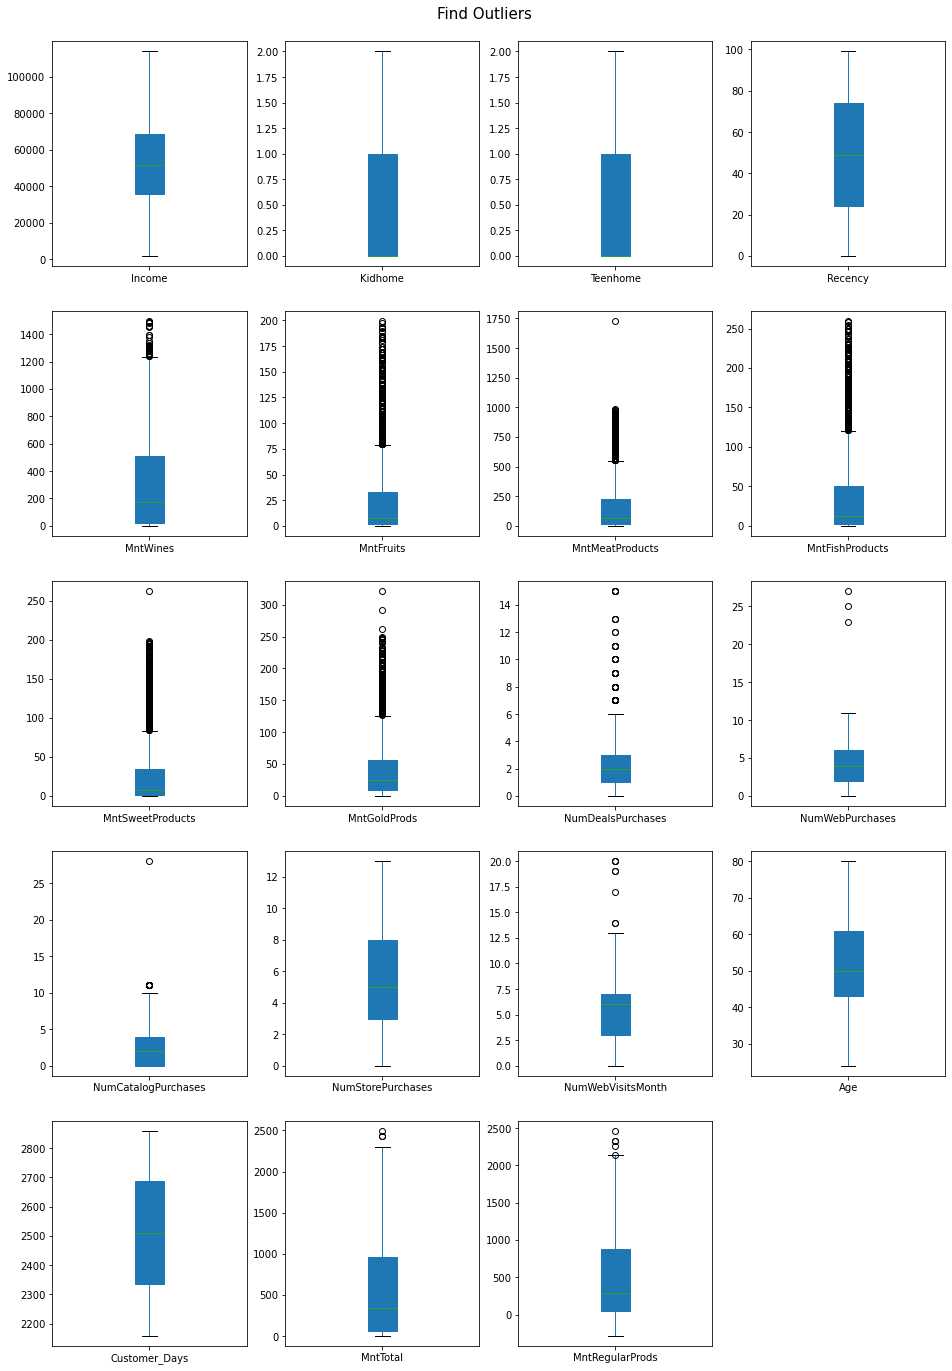

In [14]:
cols_to_drop = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain', 'Z_CostContact', 'Z_Revenue', 'marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow', 'education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD', 'AcceptedCmpOverall']
df_for_plot = df.drop(columns = cols_to_drop).select_dtypes(include = np.number)
del cols_to_drop
df_for_plot.plot(subplots = True, layout = (5, 4), kind = 'box', figsize = (16, 24), patch_artist = True)
plt.suptitle('Find Outliers', fontsize = 15, y = 0.9)
plt.savefig('feature_boxplots.png')

There are many features with outliers, but the outliers do seem like they belong because of the features' nature. In other words, the outliers exist not because of probability. Therefore, I am leaving the outliers as they are. If unexplainable outliers appear, I will consider removing them from the feature.

## EDA: Which campaigns are underperforming, then why?

Get an idea of how successful each campaign is and investigate the differences in customer characteristics and spending behaviors between customers of different campaigns.
- Characteristics - 'Income', 'Minorhome'
- Spending behaviors:
    - Products - 'MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts'
    - Channels - 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'
    - Totals - 'Total_Mnt', 'Total_num_purchase', 'AOV'

#### Which Marketing Campaigns Are Unsuccessful? 
Judge the success of campaigns based on the number of offers accepted for each campaign. Assuming the numbers of total offers from each campaign are equal, the larger the number of accepted offers, the more successful the campaign is  

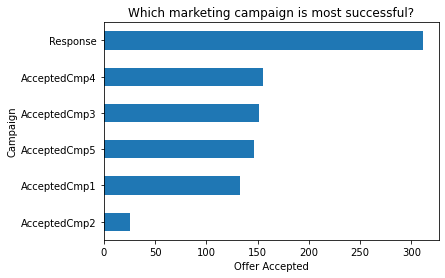

In [15]:
df[["AcceptedCmp1", "AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Response"]].sum().sort_values().plot.barh()
plt.title("Which marketing campaign is most successful?")
plt.xlabel("Offer Accepted");
plt.ylabel("Campaign")
plt.savefig('Which marketing campaign is most successful.png', bbox_inches='tight')

Assuming the number of offers handed out from each campaign are equal, the last campaign(Response) has by far the best effect while campaign 2 has by far the worst.

For further investigation, split customers into three legions: customers who did not spend in the last campaign(the most successful one), ones who did not spend in the second campaign(the most unsuccesful campaign), ones who did not spend in both. The reason we don't consider customers who only spent in campaign 2 or the last campaign is because both groups contain little to no population.

Text(0, 0.5, 'Channel')

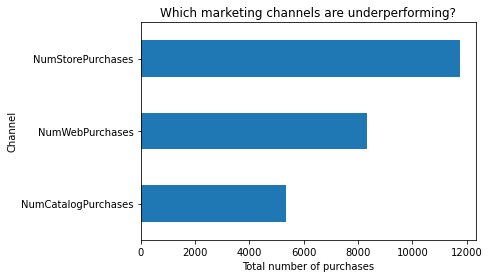

In [16]:
df[["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"]].sum().sort_values().plot.barh()
plt.title("Which marketing channels are underperforming?")
plt.xlabel("Total number of purchases")
plt.ylabel("Channel")

Assuming each customer has equal access to all purchasing channels, in-store shopping leads to the largest purchase rate while catalog shopping leads to the smallest purchase rate. We can calculate for the p value and perform correlation tests between each channel and AOV for statistical significant proof that the in-store shopping channel is the most successful one, vice versa.

#### Feature Engineering - Manual
We have neither mulitple datasets to joined together nor time series features within the dataframe; therefore, automation such as Featuretools and Tsfresj are not needed here. Below are some variables to create as they would be intuitively useful:
- Total_Num_Purchases
 - The total number of purchases in the past two years, which can be acquired by summing up all 'Num_Purchases'
- AOV
 - The average order volume of each customer, which can be calculated by dividing 'MntTotal' by 'Total_num_purchase' 

In [17]:
df['Total_Num_Purchases'] = df.NumDealsPurchases + df.NumWebPurchases + df.NumCatalogPurchases + df.NumStorePurchases + df.NumWebVisitsMonth
df['Total_Accepted_Cmp'] = df.AcceptedCmp1 + df.AcceptedCmp2 + df.AcceptedCmp2 + df.AcceptedCmp3 + df.AcceptedCmp4 + df.AcceptedCmp5 + df.Response
df['AOV'] = df.MntTotal / df.Total_Num_Purchases

df.to_csv(title, index = False)
df = pd.read_csv(title)
df.head(3)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total_Num_Purchases,Total_Accepted_Cmp,AOV
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0,32,1,47.781250
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0,11,0,1.909091
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0,25,0,29.360000


#### Feature Selection - Random Forest
One-hot encoding, splitting data into training and validation set, training a random forest, calculating for errors.
As we have dealt with null entries and the removal of our target variable, we can conduct one-hot encoding with a simple one-liner.

In [18]:
df = pd.get_dummies(df)

X = df.drop(columns = [
    'Total_Accepted_Cmp', 'AcceptedCmpOverall', 'Response', 'AcceptedCmp1', 'AcceptedCmp2', \
    'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'
])
y = df['AcceptedCmp2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3) 

#Create a Random Forest Classifier with 200 trees
rg = RandomForestRegressor(n_estimators = 200, n_jobs = -1)

rg.fit(X_train, y_train)
y_pred=rg.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.02611202635914333
Mean Squared Error: 0.011717792421746294
Root Mean Squared Error: 0.108248752518199


Thanks to our random forest model, we get to know feature importance scores.

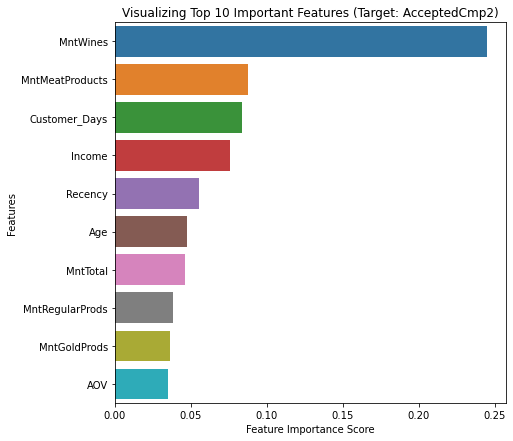

In [19]:
# finding feature importance scores
feature_imp = pd.Series(rg.feature_importances_, 
        index = list(X.columns)).sort_values(ascending=False)

feature_imp = feature_imp[:10]

# Creating a bar plot
plt.figure(figsize = (7, 7))
sb.barplot(x=feature_imp[:10], y=feature_imp.index[:10])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Top 10 Important Features (Target: AcceptedCmp2)")
plt.savefig('important_feautres.png', bbox_inches='tight')
plt.show()

The amount spent on wines is by far the most contributing feature to predicting whether a customer participated in campaign 2.

In [20]:
correlation = {}
for f in feature_imp.index:
    correlation[f] = df[f].corr(df['AcceptedCmp2'])

dict(sorted(correlation.items(), key=lambda item: item[1], reverse = True))

{'MntWines': 0.19983292692318297,
 'MntTotal': 0.1363948855909653,
 'MntRegularProds': 0.13624857774777283,
 'AOV': 0.12907520314478657,
 'Income': 0.10895835903071115,
 'MntGoldProds': 0.059577205759850156,
 'MntMeatProducts': 0.04880759089272688,
 'Customer_Days': 0.009194999866518507,
 'Age': 0.0007343915509754145,
 'Recency': -0.00908679274608877}

#### Feature Importance - Shap Values

Additionally, calculate for Shapley Values for comparison with the feature importance scores we got.

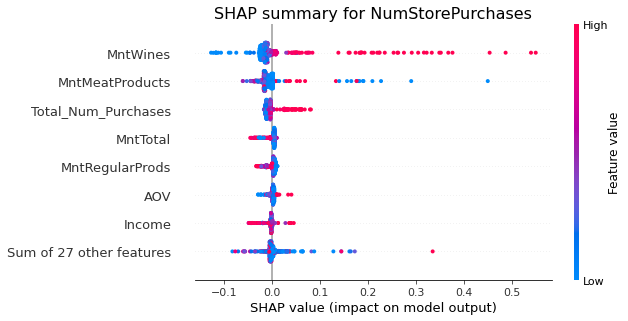

<Figure size 432x288 with 0 Axes>

In [21]:
ex = shap.Explainer(rg, X_train)
shap_values = ex(X_test)

plt.title('SHAP summary for NumStorePurchases', size=16)
fig = shap.plots.beeswarm(shap_values, max_display=8)
plt.savefig('shap.png', bbox_inches='tight')
plt.show()

According to shapley values, MntWines still has by far the largest impact on whether a customer participates in campaign 2.

#### Feature Selection - Correlation Heatmap
Apart from the knowing feature importance scores and Shapley Values, also use a heatmap to plot the correlation between each set of features. Blue indicates a positive correlation while red indicates a negative correlation.
Take notes of anomalies and actionable patterns.

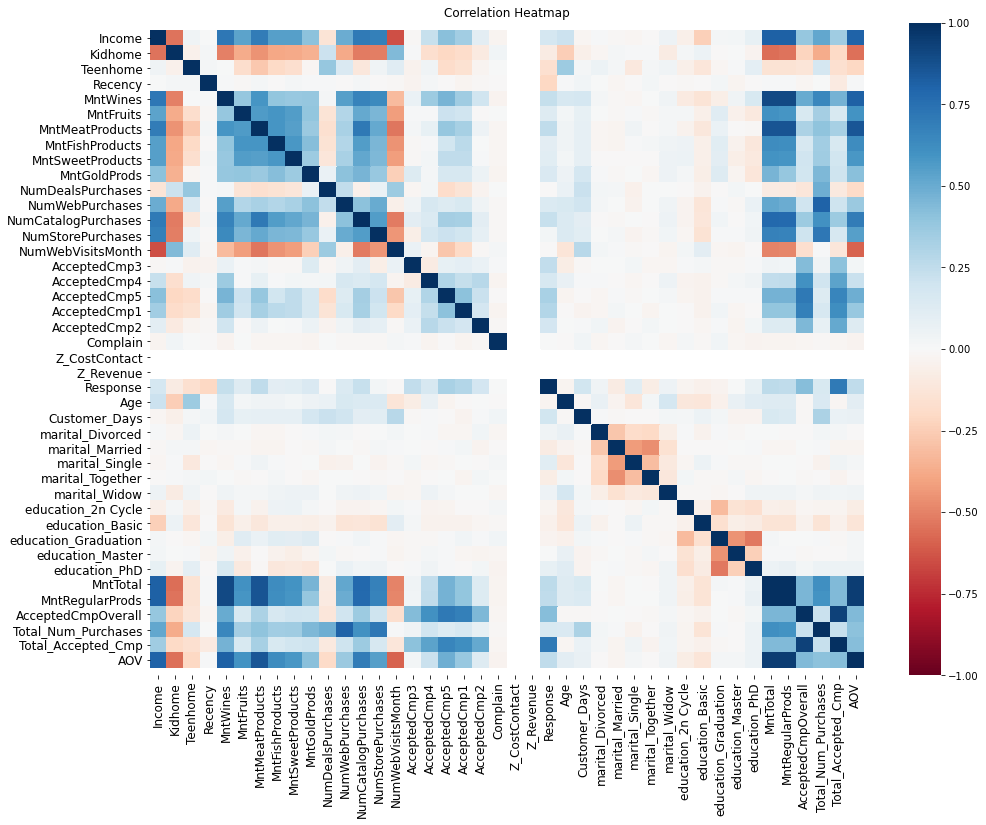

In [22]:
plt.figure(figsize = (16, 12))
s = sb.heatmap(df.corr(),  cmap = 'RdBu', vmin = -1, vmax = 1,center = 0)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
bottom, top = s.get_ylim()
s.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Correlation Heatmap")
plt.savefig('correlation_heatmap.png', bbox_inches = 'tight')
plt.show()

Observations:
- Customers with high-income
 - tend to spend much more on everything and make purchases more frequently
 - interestingly, tend to visit the company's website much less frequently than other people
 - tend to have fewer number of kids
- Cusotmers with kids at home
 - tend to spend less on everything
 - tend to visit our website more frequently
 - tned to make purchases with discounts more frequently 
- The number of web visits
 - interestingly, is significantly negatively correlated to income
 - is negatively correlated to amount spent on various kinds of products
- Total count of purchases is positively correlated to channel, in order,
 - web, store, catalog
- AOV is positively correlated to channel, in order,
 - catalog, store, web

Anomalies:

Intuitively, the more complaints a customer has, the less the customer should spend and the fewer purchases the customer should make. However, the number of complaints in the last two years has nearly no correlation  with the total amount spent in the past two years.

## EDA: Anomalies and actionable insights
The nature of the data, the horizontal bar chart of campaign and channel performances, and the heatmap of the correlation test presents some anomalies and plenty of room for us to discover actionable insights.

#### Anomalies
- Underwhelming correlation value between number of complaints and total amount spent, AOV

Text(0.5, 1.0, 'Complain vs. MntTotal')

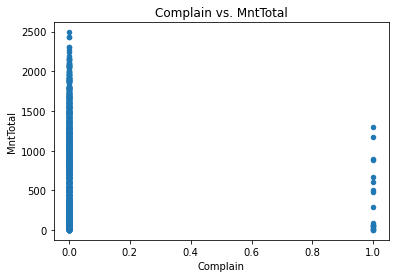

In [33]:
df.plot(x = 'Complain', y = 'MntTotal', kind = 'scatter')
plt.title('Complain vs. MntTotal')

In [34]:
r, p_value = pearsonr(x = df['Complain'], y = df['MntTotal'])
print('Pearson correlation (r): ', r)
print('Pearson p-value: ', p_value)

Pearson correlation (r):  -0.030881316598371872
Pearson p-value:  0.16521070999047358


In [35]:
df[df['Complain'] > 0].shape[0], df.shape[0]

(19, 2021)

After invesgitation, it turns out that out of the 2021 legit records, there are only 19 customers who complained in the past two years, while we have 2021 customers in total. 

## EDA: Difference between customers groups
By now we already know how each campaign performs and what might be the causes of their respective performances. Go above and beyond by investigating the behaviors and characteristics of customers from different campaigns and compare them.

In [39]:
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall', 'Total_Num_Purchases', 'Total_Accepted_Cmp',
       'AOV'],
      dtype='object')

In [40]:
new_df = df[['Response', 'AcceptedCmp2', 'Total_Accepted_Cmp', 'Income', 'Kidhome', 'Teenhome', 'Recency',
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Age', 'Customer_Days', 'marital_Divorced',
    'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow', 'MntTotal', 'education_Basic',
    'education_Graduation', 'education_Master', 'education_PhD', 'Total_Num_Purchases', 'AOV']]

In [41]:
accepted_two = new_df[new_df.AcceptedCmp2 > 0]
didnt_accept_two = new_df[new_df.AcceptedCmp2 == 0]
accepted_last = new_df[new_df.Response > 0]
didnt_accept_last = new_df[new_df.Response == 0]

In [42]:
accepted_two = accepted_two.drop_duplicates()
didnt_accept_two = didnt_accept_two.drop_duplicates()
accepted_last = accepted_last.drop_duplicates()
didnt_accept_last = didnt_accept_last.drop_duplicates()

In [43]:
accepted_two.shape[0], didnt_accept_two.shape[0], accepted_last.shape[0], didnt_accept_last.shape[0]

(26, 1995, 311, 1710)

In [44]:
accepted_two = accepted_two.drop(['Response', 'AcceptedCmp2', 'Total_Accepted_Cmp'], axis = 1)
didnt_accept_two = didnt_accept_two.drop(['Response', 'AcceptedCmp2', 'Total_Accepted_Cmp'], axis = 1)
accepted_last = accepted_last.drop(['Response', 'AcceptedCmp2', 'Total_Accepted_Cmp'], axis = 1)
didnt_accept_last = didnt_accept_last.drop(['Response', 'AcceptedCmp2', 'Total_Accepted_Cmp'], axis = 1)

**The comparison of customer charateristics & behaviors between customers who accepted campaign 2 vs. those who didn't**

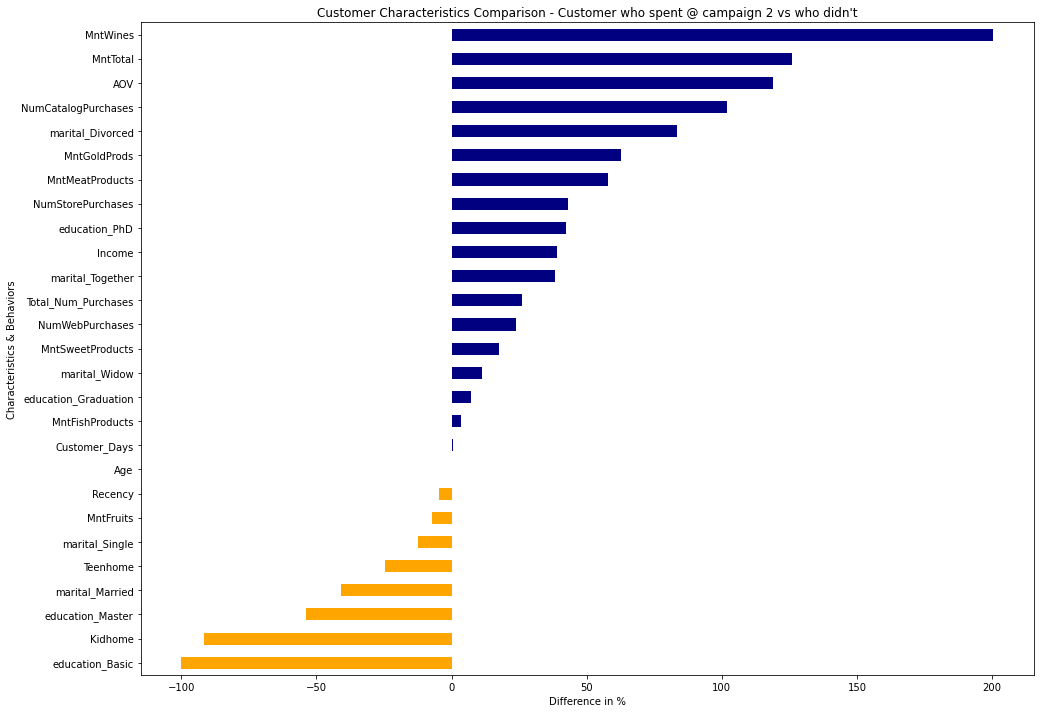

In [45]:
plt.figure(figsize = (16, 12))
value1 = pd.DataFrame((((accepted_two.mean()) - didnt_accept_two.mean()) / didnt_accept_two.mean())*100)
value1.dropna(inplace = True)
value1.sort_values(by=0,inplace = True)
value1['positive'] = value1[0] >=0
value1[0].plot(kind='barh', color=value1.positive.map({True: 'navy', False: 'orange'}))
plt.title("Customer Characteristics Comparison - Customer who spent @ campaign 2 vs who didn't")
plt.xlabel("Difference in %")
plt.ylabel("Characteristics & Behaviors");

In [46]:
value1

,0,positive
education_Basic,-100.000000,False
Kidhome,-91.426730,False
education_Master,-53.915454,False
marital_Married,-40.900563,False
Teenhome,-24.773756,False
marital_Single,-12.407798,False
MntFruits,-7.305698,False
Recency,-4.771656,False
Age,0.148714,True
Customer_Days,0.657903,True


#### Random Forest for Feature Importance: Response
What features contributed to the most successful campaign?

In [47]:
X = df.drop(columns = [
    'Total_Accepted_Cmp', 'AcceptedCmpOverall', 'Response', 'AcceptedCmp1', 'AcceptedCmp2', \
    'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'
])

y = df['Response']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3) 

#Create a Random Forest Classifier with 200 trees
rg = RandomForestRegressor(n_estimators = 200, n_jobs = -1)

rg.fit(X_train, y_train)
y_pred=rg.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.19727290081326324
Mean Squared Error: 0.09361040297224205
Root Mean Squared Error: 0.3059581719324425


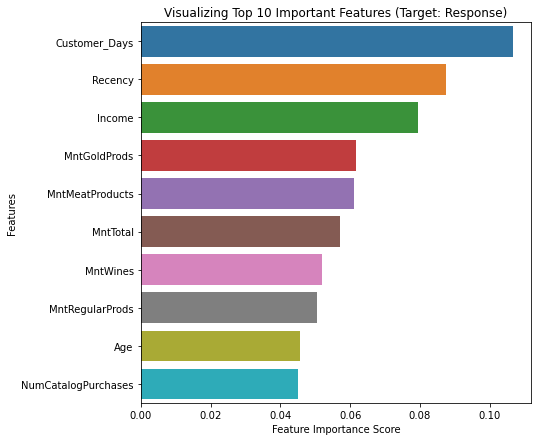

In [48]:
# finding feature importance scores
feature_imp = pd.Series(rg.feature_importances_, 
        index = list(X.columns)).sort_values(ascending=False)

feature_imp = feature_imp[:10]

# Creating a bar plot
plt.figure(figsize = (7, 7))
sb.barplot(x=feature_imp[:10], y=feature_imp.index[:10])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Top 10 Important Features (Target: Response)")
plt.savefig('important_feautres.png', bbox_inches='tight')
plt.show()

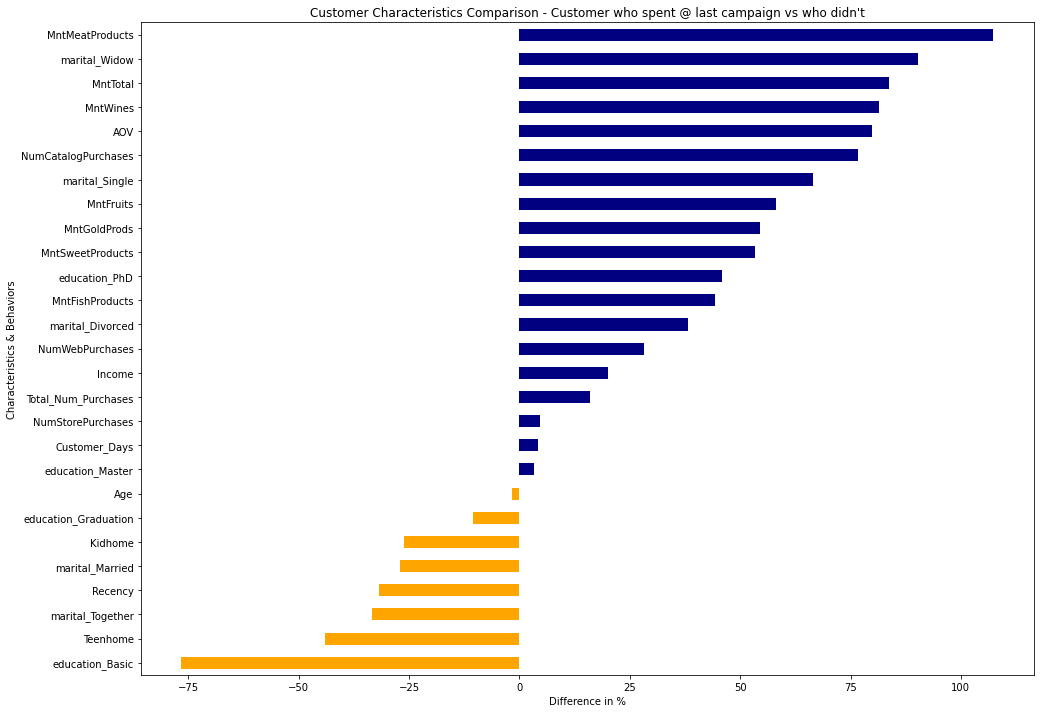

In [49]:
plt.figure(figsize = (16, 12))
value1 = pd.DataFrame((((accepted_last.mean()) - didnt_accept_last.mean()) / didnt_accept_last.mean())*100)
value1.dropna(inplace = True)
value1.sort_values(by=0,inplace = True)
value1['positive'] = value1[0] >=0
value1[0].plot(kind='barh', color=value1.positive.map({True: 'navy', False: 'orange'}))
plt.title("Customer Characteristics Comparison - Customer who spent @ last campaign vs who didn't")
plt.xlabel("Difference in %")
plt.ylabel("Characteristics & Behaviors");

In [50]:
correlation = {}
for f in feature_imp.index:
    correlation[f] = df[f].corr(df['Response'])

dict(sorted(correlation.items(), key=lambda item: item[1]))

{'Recency': -0.2039535990853687,
 'Age': -0.026152886485822528,
 'MntGoldProds': 0.1544519958391905,
 'Income': 0.17516730066235056,
 'Customer_Days': 0.1904455264682854,
 'NumCatalogPurchases': 0.23397529484254012,
 'MntWines': 0.23711473890143078,
 'MntMeatProducts': 0.2509621994465438,
 'MntRegularProds': 0.2573902377081736,
 'MntTotal': 0.2614211073212523}

## Recommendations for the CMO

The customers who accepted campaign 2 has the following characteristics, compared to those who didn't:

- 3 times amount spent on wine, 1.7 times amount spent on gold, 1.6 times amount spent on meat
- 2.2 times AOV and total amount spent
- 1.5 times income
- 1.8 times divorced, 1.6 times single, 1.1 times widow
- 1.5 times PhD

The customers who accetped campaign two spend much more in total and on expensive/luxurious products, earn much more, are much more likely to be alone and not have children, and are much more likely to have received high education. 

*These customers are single, well educated, average aged folks who are doing very well financially.*

Reflections on the failed campaign:
- Campaign 2 was promoting mostly expensive, luxurious goods that only these customers can afford & are interested in.
- Since the customers whom we didn't capture are much more likely to be currently married and have children, we can promote household essentials, kids and teens goods, and school supplies to get them in.
- Since the customers whom we didn't capture have less spending power and maybe less spending will, we can release larger discounts in the next campaign.

The most important factors that contributes to accepting campaign 2 are
- MntWines, NumWebPurchases, Customer_Days, MntMeatProducts, Recency, MntRegularProducts, Income, MntTotal, Age, NumCatalogPurchases.

The last campaign performed twice as good as the runner up. Reasons:
- It attracted much more total amount spent, amount spend on various products, AOV, and a slighter increase in number of web purchases and total number of purchases.
- Customers in the last campaign spent approximately two times more on both meat products and wines compared to customers in campaigns 1345.
- Customers in the last campaign purchased more evenly.

There is a better chance a customer makes a purchase if shopping in-store. Potential reasons:
- In-store shopping leads to higher probability of impulsive purchases. 
- A larger portion of customers were just window shopping when shopping on web compared to when they bring themselves to a physical store. For example, a customer might browse on web only to check the availability of a product as they want to feel the product in person before actually purchasing. 

## Actionable Data-Driven Solutions
On acquisition:
- Focus on promoting wines and meat products.
- Promote web purchasing.

On increasing revenue:
- Have marketing campaigns to convert customers who shop online or catalog into in-store consumers because in-store purchases have a higher average order volume.
- Build a loyalty program to make high-income customers loyal as long as possible.